# Exploratory Study on Vehicle Crash Trends in San Jose, CA (2011-2023)
 Author: Austin Kim
 
 Published Date: 06/24/2023

## Introduction
This research aims to analyze vehicle crash incidents in San Jose, CA, from 2011 to June 18, 2023, using data from the [San Jose CA Open Data Portal](https://data.sanjoseca.gov/dataset/crashes-data). </br> This observatory study will address any concerns about traffic safety and the increase in vehicular accidents in the area.

## Background
The data for this research comes from two primary sources provided by the [San Jose CA Open Data Portal](https://data.sanjoseca.gov/dataset/crashes-data):
- [vehiclecrashdata2011-2020.csv](./vehiclecrashdata2011-2020.csv)
- [vehiclecrashdata2021-present.csv](./vehiclecrashdata2021-present.csv)

The study investigates several key questions:

1. Which vehicle type (PartyType) experiences the most severe vehicle damage?
2. Does sobriety impact the severity of vehicle damage?
3. Is there a correlation between the driver's sex and the severity of vehicle damage?
4. Which movements preceding collisions cause the most damage?
5. Which age group experiences the most severe vehicle damage?

An objective will also be in creating a model predicting vehicle damage based on the collected data.

## Analysis
The analysis begins by importing the necessary libraries and loading the CSV files into dataframes. After verifying that the columns are consistent across the files, the dataframes are concatenated into a single dataframe. Missing values are identified and addressed, with columns containing excessive missing data being dropped.

#### Importing Libraries

In [114]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

Now let's import the csv file of the vehicle crash data provided by the San Jose CA Open Data portal. </br>
One file is from 2011 to 2020 while the other vehicle crash data is from 2021 to the present (as of June 18th 2023). </br>
I will verify that the columns are the same for both files and then combine them into one dataframe.


#### Data Preparation
The initial data prepartion includes: </br>
 + Dropping Columns with excessive values or irrelevant data </br>
 + Dropping rows with missin gvalues </br>
 + Converting categorical variables into numerical values

In [91]:
dfs = [  # load all csv files into a list of dataframes
    pd.read_csv('vehiclecrashdata2011-2020.csv'),
    pd.read_csv('vehiclecrashdata2021-present.csv')
]

shapeY = dfs[0].shape[1]

for df in dfs:
    if shapeY != df.shape[1]:       # check if columns are the same for each df
        print('Columns are not the same')
    print('Shape of data below', df.shape)
    display(df.head())  # display each df head

Shape of data below (115302, 15)


,CrashName,Name,Sex,Age,Speed,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription
0,CR-0000063652,ACV-0000000030,M,0,NaN,Minor,Driver,Impairment Not Known,East,Proceeding Straight,Car,Unknown,1,00001,Other Improper Driving
1,CR-0000068628,ACV-0000000031,NaN,0,NaN,Unknown,Driver,Impairment Not Known,Unknown,Backing,Unknown,Inattention,1,00001,Other Improper Driving
2,CR-0000064498,ACV-0000000032,F,50,NaN,Minor,Driver,Had Not Been Drinking,South,Parking Maneuver,Car,Unknown,1,00001,Other Improper Driving
3,CR-0000068721,ACV-0000000033,M,19,NaN,Minor,Driver,Had Not Been Drinking,North,Proceeding Straight,Car,Inattention,1,00001,Other Improper Driving
4,CR-0000064227,ACV-0000000034,M,16,NaN,Unknown,Driver,Had Not Been Drinking,East,Making Left Turn,Car,None Apparent,1,00001,Other Improper Driving


Shape of data below (20240, 15)


,CrashName,Name,Sex,Age,Speed,VehicleDamage,PartyCategory,Sobriety,VehicleDirection,MovementPrecedingCollision,PartyType,OtherAssociatedFactor,VehicleCount,ViolationCode,ViolationCodeDescription
0,CR-0000085197,ACV-0000174389,M,33,NaN,Unknown,Driver,Impairment Not Known,West,Stopped,Car,Unknown,1,Unknown,Unknown
1,CR-0000085197,ACV-0000174390,NaN,0,NaN,Unknown,Driver,Impairment Not Known,West,Making Right Turn,Car,Unknown,1,Unknown,Unknown
2,CR-0000085218,ACV-0000174429,M,19,NaN,Major,Driver,Had Not Been Drinking,East,Proceeding Straight,Car,Speeding,1,23103,Reckless Driving 2
3,CR-0000085218,ACV-0000174430,NaN,0,NaN,Moderate,Parked,Not Applicable,Not Applicable,Parked,Car,Unknown,1,Not Applicable,Not Applicable
4,CR-0000085218,ACV-0000174431,NaN,0,NaN,Moderate,Parked,Not Applicable,Not Applicable,Parked,Car,Unknown,1,Not Applicable,Not Applicable


Concatenate the two dataframes into one dataframe called "df". </br>
Here, I am verifying that the individual shape add up to the total shape to make sure I concatenated the dataframes correctly. </br>
The columns are checked in the last cell so I will only check the rows here.


In [92]:
df = pd.concat(dfs, axis=0, ignore_index=True)

print('Shape of combined data:', df.shape)

Shape of combined data: (135542, 15)


I want to check the null or empty values for each column. </br>
If too much data is missing from a columns I will remove it. 

In [93]:
print('\nNull Values for each column:')       # check for null values
print(df.isnull().sum())


Null Values for each column:
CrashName                         0
Name                              0
Sex                           35804
Age                               0
Speed                         84772
VehicleDamage                  4163
PartyCategory                     0
Sobriety                          0
VehicleDirection                  0
MovementPrecedingCollision        0
PartyType                         0
OtherAssociatedFactor             0
VehicleCount                      0
ViolationCode                     0
ViolationCodeDescription          0
dtype: int64


Too many values are missing for "Speed", so I will drop it. </br>
"Name" and "CrashName" are not relavent with this study and can be dropped.


In [94]:
df = df.drop(columns=["Speed",
                      "CrashName",
                      "Name"])         # Too many missing values

df = df.dropna()                        # drop rows with missing values

Observing the Unique values in each column to see if some columns are irrelevant or can be dropped. </br>

In [95]:
print('Unique Values for each column:')
for col in df.columns:
    print(col, df[col].unique())

Unique Values for each column:
Sex ['M' 'F']
Age [  0  50  19  16  23  76  25  48  20  18  38  45  62  36  59  58  28  41
  34  22  57  24  42  37  21  43  40  32  52  80  17  55  31  61  65  74
  64  35  30  70  47  66  85  56  44  51  39  63  54  77  46  26  67  27
  33  53  71  72  60  29  15  73  90  14  69  49  11  68  82  89  81  13
  10  88  12  93  78   6   8  86  75   9  84  83   1  79  87  92  95   5
   4  98  91  99  96   7   3   2  97  94 100 150 101 140]
VehicleDamage ['Minor' 'Unknown' 'Major' 'Moderate' 'Not Applicable' 'Totaled']
PartyCategory ['Driver' 'Parked' 'Bicycle' 'Pedestrian' 'Other' 'Unknown']
Sobriety ['Impairment Not Known' 'Had Not Been Drinking'
 'Had Been Drinking - Not Under Influence' 'Sleepy/Fatigued'
 'Impairment Physical' 'Had Been Drinking - Under Influence'
 'Under Drug Influence' 'Had Been Drinking - Impairment Unknown'
 'Not Applicable']
VehicleDirection ['East' 'South' 'North' 'Not Applicable' 'West' 'Unknown']
MovementPrecedingCollision ['Proce

Viewing the unique values for each column, I noticed that there are too many "OtherAssociatedFactor", "ViolationCode" and "ViolationCodeDescription" and these features will not help with the data. </br>
The column "VehicleCount" only has one value which won't influence in finding relations. </br>


In [96]:
df = df.drop(columns=["OtherAssociatedFactor",
                      "ViolationCode",
                      "ViolationCodeDescription",
                      "VehicleCount"])

Removing the Unknown values from all columns. </br>

In [97]:
df = df[df.Age != 0]
df = df[df.VehicleDamage != 'Unknown']
df = df[df.VehicleDamage != 'Not Applicable']
df = df[df.PartyCategory != 'Unknown']
df = df[df.Sobriety != 'Impairment Not Known']
df = df[df.Sobriety != 'Not Applicable']
df = df[df.VehicleDirection != 'Not Applicable']
df = df[df.VehicleDirection != 'Unknown']
df = df[df.MovementPrecedingCollision != 'Unknown']
df = df[df.PartyType != 'Unknown']

df = df.rename(columns={'VehicleDamage': 'Damage',  # shorten column name
                        'PartyCategory': 'PartyCat',
                        'VehicleDirection': 'Direction',
                        'MovementPrecedingCollision': 'Movement'})

print('Shape after cleaning', df.shape)                # check new size of dataset
display(df.head())                      # show first five rows of data

Shape after cleaning (50733, 8)


,Sex,Age,Damage,PartyCat,Sobriety,Direction,Movement,PartyType
2,F,50,Minor,Driver,Had Not Been Drinking,South,Parking Maneuver,Car
3,M,19,Minor,Driver,Had Not Been Drinking,North,Proceeding Straight,Car
9,M,76,Major,Driver,Had Not Been Drinking,West,Proceeding Straight,Panel Truck
13,M,20,Minor,Driver,Had Not Been Drinking,West,Making Left Turn,Car
14,F,18,Moderate,Driver,Had Not Been Drinking,West,Proceeding Straight,Car


Convert all the object datatypes into numerical datatypes so that I can generate a pairplot and correlation matrix. </br>


In [98]:
print('Data Types:')
print(df.dtypes)

Data Types:
Sex          object
Age           int64
Damage       object
PartyCat     object
Sobriety     object
Direction    object
Movement     object
PartyType    object
dtype: object


Convert categorical variables into numerical values. </br>

In [99]:
# prepare data for pairplot
sex_dict = {'F': 0, 'M': 1}
df['Sex'] = df['Sex'].map(sex_dict)

damage_dict = {'None': 0, 'Minor': 1, 'Moderate': 2, 'Major': 3, 'Totaled': 4}
df['Damage'] = df['Damage'].map(damage_dict)

partycat_dict = {'Driver': 0, 'Parked': 1, 'Bicycle': 2, 'Pedestrian': 3, 'Other': 4}
df['PartyCat'] = df['PartyCat'].map(partycat_dict)


movement = df['Movement'].unique()
movement_dict = {}
for i in range(len(movement)):
    movement_dict[movement[i]] = i
df['Movement'] = df['Movement'].map(movement_dict)

sobriety = df['Sobriety'].unique()
sobriety_dict = {}
for i in range(len(sobriety)):
    sobriety_dict[sobriety[i]] = i
print('Sobriety Definition Below')
print(sobriety_dict)
df['Sobriety'] = df['Sobriety'].map(sobriety_dict)

direction_dict = {'North': 0, 'West': 1, 'South': 2, 'East': 3}
df['Direction'] = df['Direction'].map(direction_dict)

partyType = df['PartyType'].unique()
partyType_dict = {}
for i in range(len(partyType)):
    partyType_dict[partyType[i]] = i
print('PartyType Definition Below')
print(partyType_dict)
df['PartyType'] = df['PartyType'].map(partyType_dict)

print()
display(df.head())

print('Data Types:')
print(df.dtypes)


Sobriety Definition Below
{'Had Not Been Drinking': 0, 'Had Been Drinking - Not Under Influence': 1, 'Sleepy/Fatigued': 2, 'Impairment Physical': 3, 'Under Drug Influence': 4, 'Had Been Drinking - Under Influence': 5, 'Had Been Drinking - Impairment Unknown': 6}
PartyType Definition Below
{'Car': 0, 'Panel Truck': 1, 'Motorcycle/Moped': 2, 'Car With Trailer': 3, 'Emergency Vehicle': 4, 'Bus - Other': 5, 'Other': 6, 'Scooter Motorized': 7, 'Construction Equipment': 8, 'Semi Truck': 9, 'Bicycle': 10, 'Skateboard': 11, 'Scooter Non-Motorized': 12, 'Wheelchair': 13, 'Bus - School': 14, 'Pedestrian': 15, 'Light Rail Vehicle': 16, 'Ice Cream Truck': 17, 'Train': 18}



,Sex,Age,Damage,PartyCat,Sobriety,Direction,Movement,PartyType
2,0,50,1,0,0,2,0,0
3,1,19,1,0,0,0,1,0
9,1,76,3,0,0,1,1,1
13,1,20,1,0,0,1,2,0
14,0,18,2,0,0,1,1,0


Data Types:
Sex          int64
Age          int64
Damage       int64
PartyCat     int64
Sobriety     int64
Direction    int64
Movement     int64
PartyType    int64
dtype: object


#### Exploratory Data Analysis
I will create a pairplot and a correlation matrix to view the relationship between the features. </br>

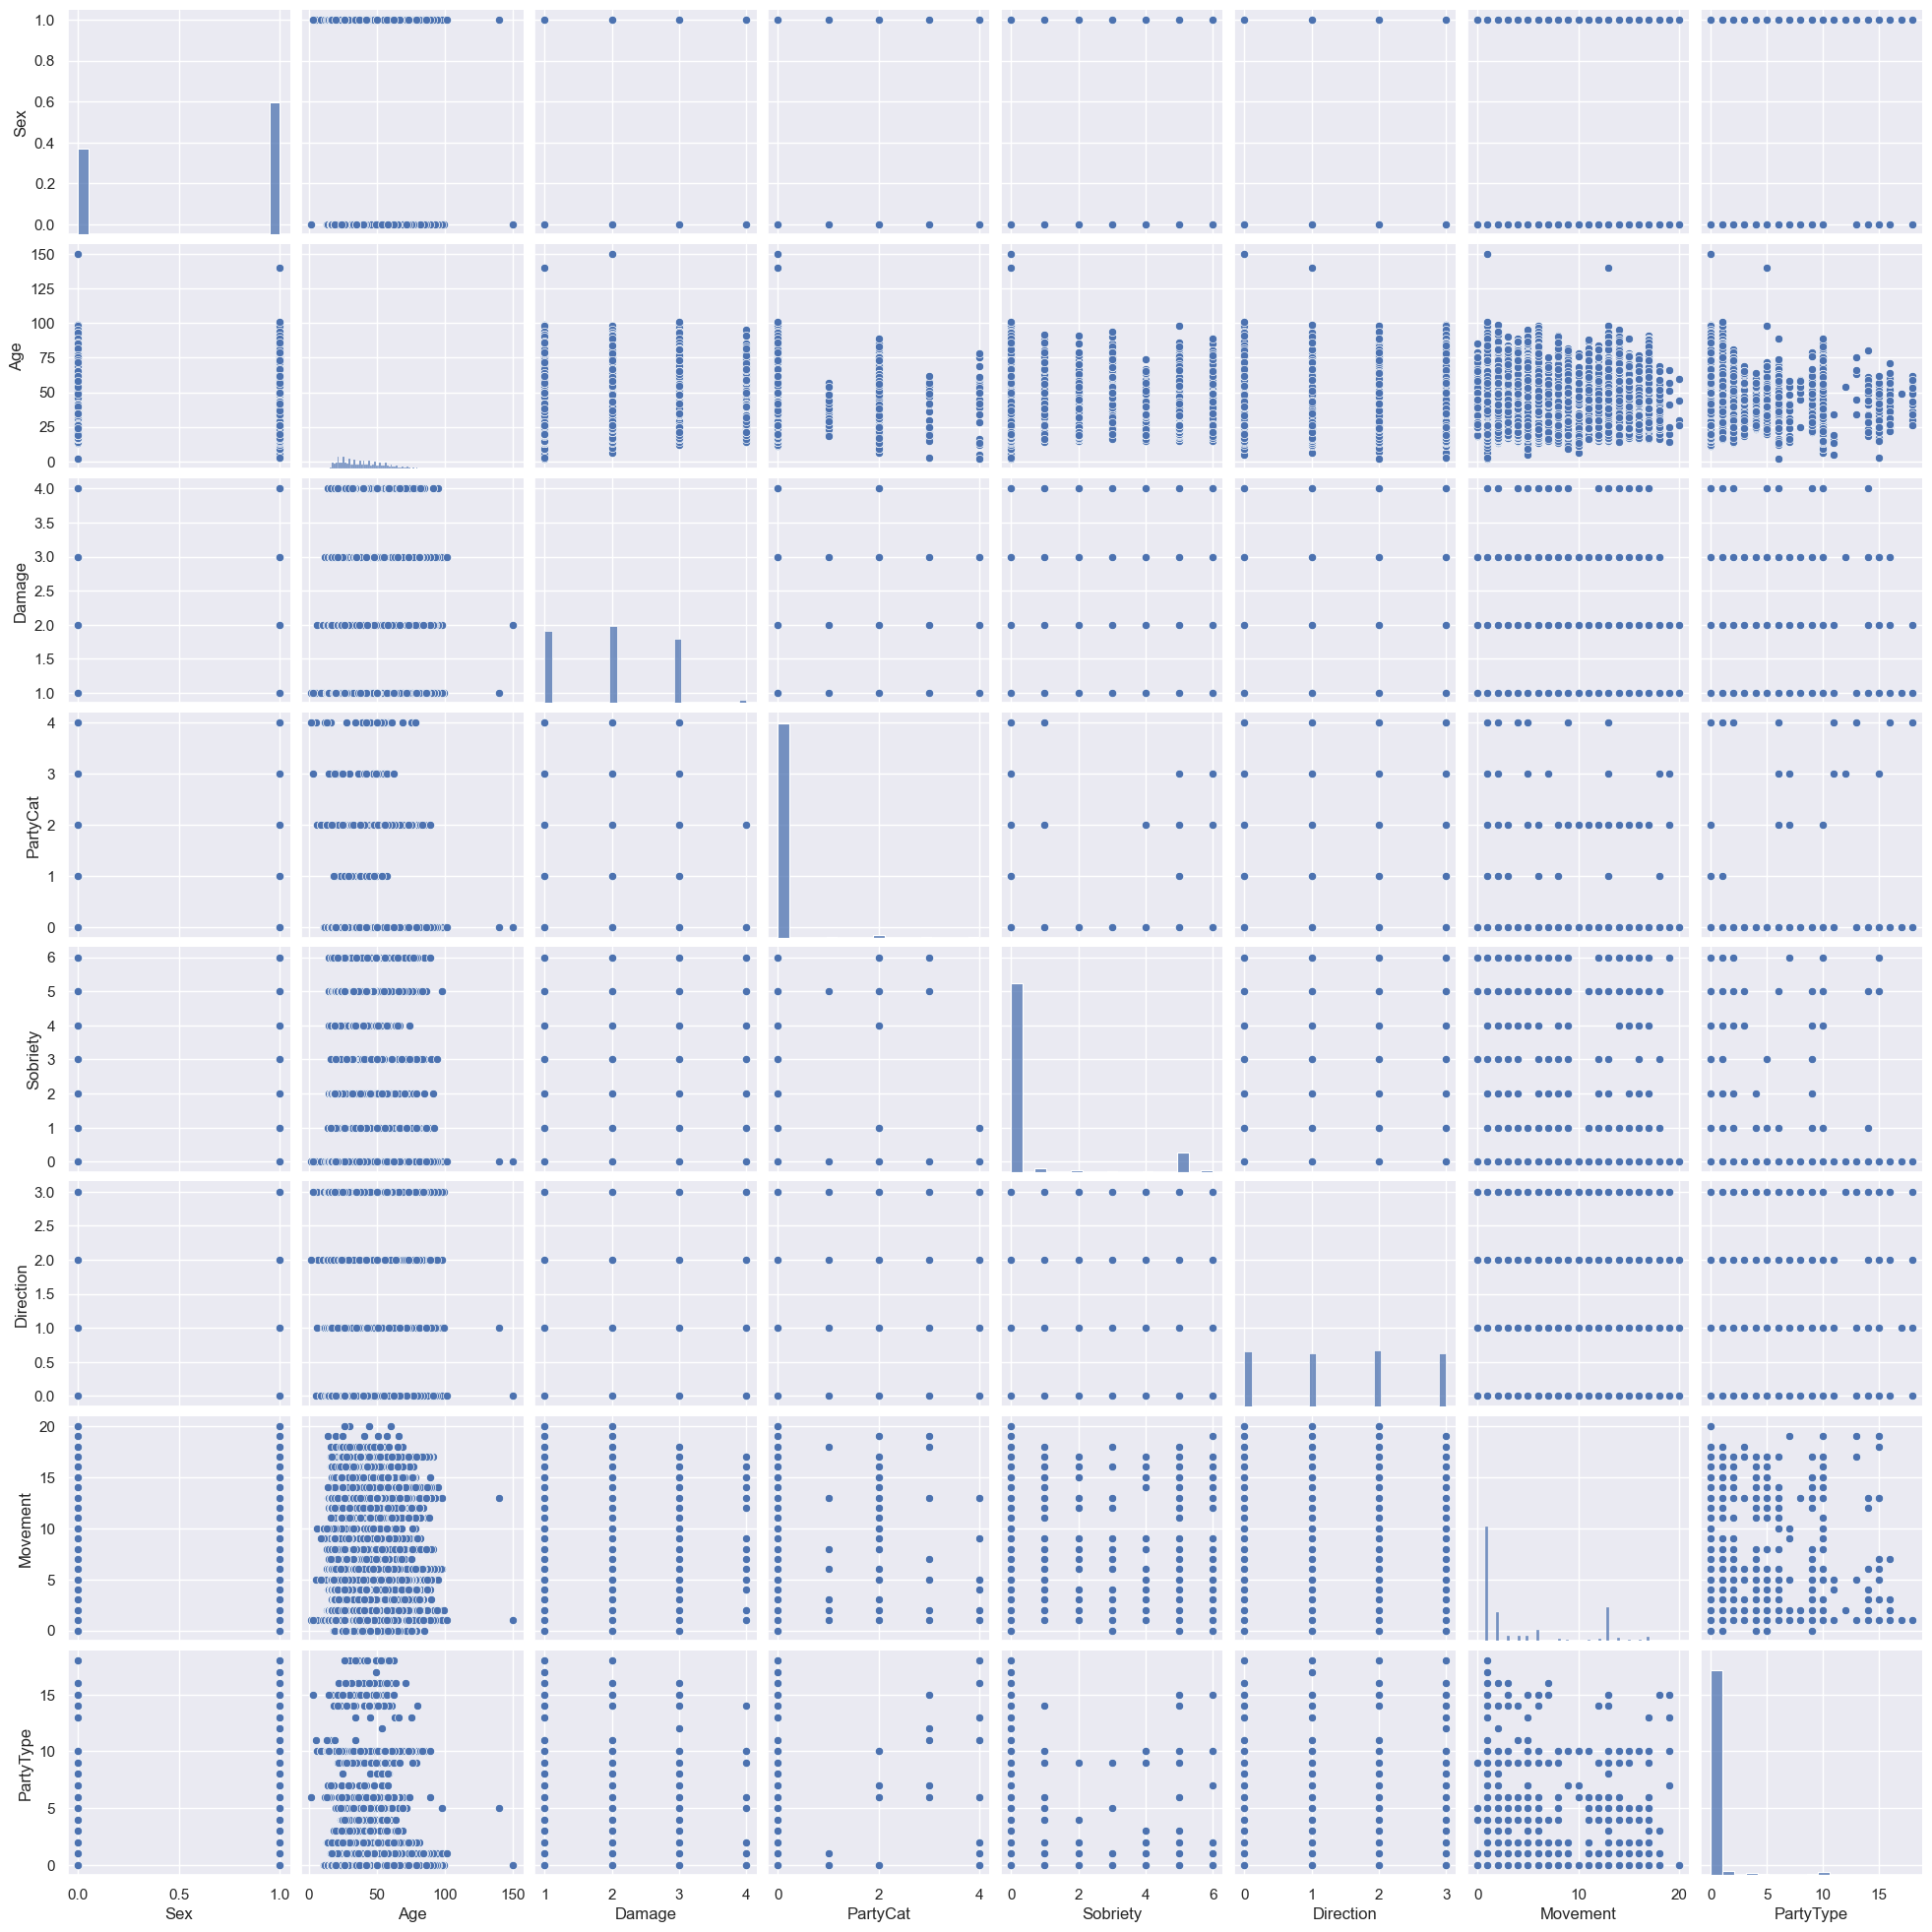

In [100]:
sns.set(rc={'figure.figsize': (10, 10)})  # set figure size
sns.pairplot(df)
plt.show()

In [101]:
corr = df.corr()

print('Correlation Matrix:')
display(corr)

Correlation Matrix:


,Sex,Age,Damage,PartyCat,Sobriety,Direction,Movement,PartyType
Sex,1.000000,-0.019113,0.019291,0.050231,0.109745,0.000649,-0.014118,0.133929
Age,-0.019113,1.000000,-0.086239,-0.030016,-0.120345,0.006783,0.020240,0.000334
Damage,0.019291,-0.086239,1.000000,-0.067009,0.165210,-0.003236,-0.221201,-0.124160
PartyCat,0.050231,-0.030016,-0.067009,1.000000,-0.026878,0.004721,-0.009584,0.668826
Sobriety,0.109745,-0.120345,0.165210,-0.026878,1.000000,0.002796,-0.076940,-0.046169
Direction,0.000649,0.006783,-0.003236,0.004721,0.002796,1.000000,0.006678,0.000442
Movement,-0.014118,0.020240,-0.221201,-0.009584,-0.076940,0.006678,1.000000,-0.009605
PartyType,0.133929,0.000334,-0.124160,0.668826,-0.046169,0.000442,-0.009605,1.000000


Visually viewing the seaborn pairplot, there are no apprant  correlation between any of the features. </br>
Viewing the correlation matrix above, "PartyCat" and "PartyType" has a moderate to strong correlation.

#### Model Building
To start, I will view the distribution of some of the features that might be a good candidate for the model. </br>

I will start by viewing these features in a histogram. </br>

Text(0.5, 0, 'Movement')

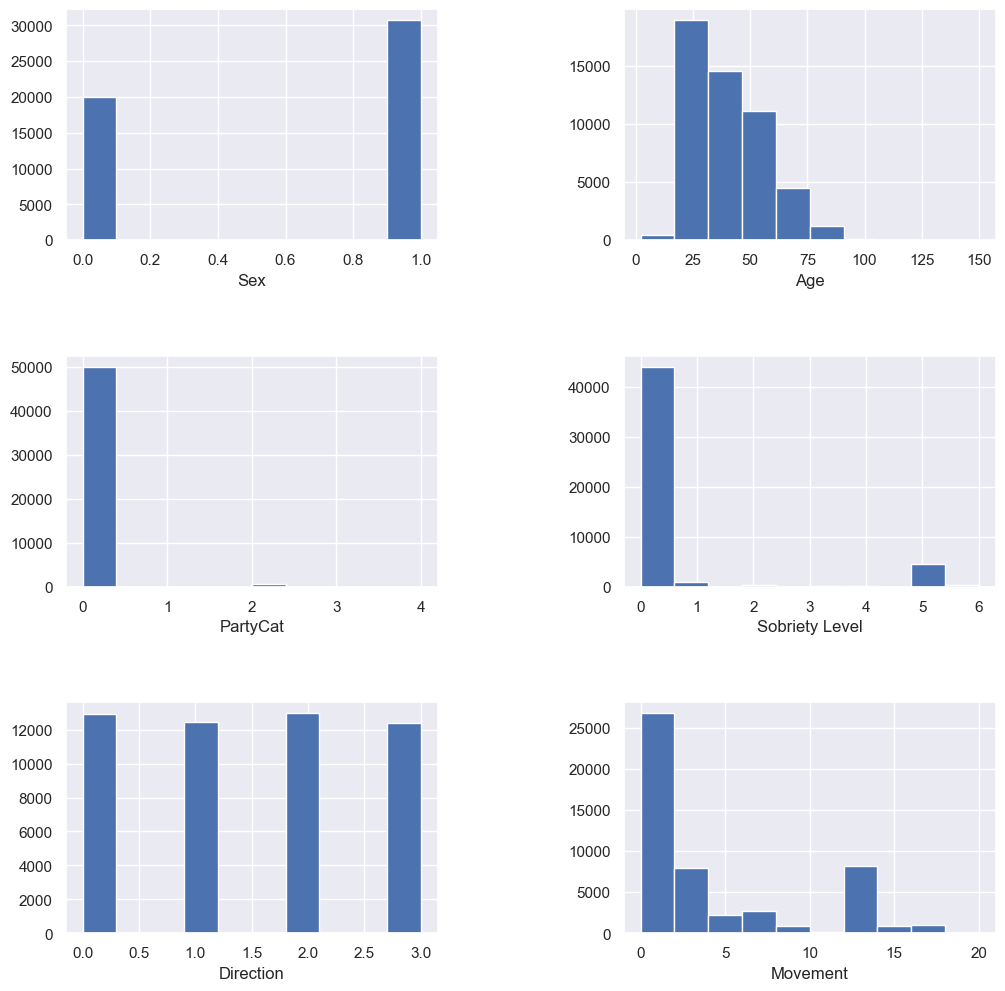

In [102]:
fig = plt.figure(figsize=(12, 12))

plt.subplot(3, 2, 1)       # 2x2 1 subplot
plt.subplots_adjust(hspace=0.5, wspace=0.5)

plt.hist(df['Sex'])
plt.xlabel('Sex')

plt.subplot(3, 2, 2)
plt.hist(df['Age'])
plt.xlabel('Age')

plt.subplot(3, 2, 3)
plt.hist(df['PartyCat'])
plt.xlabel('PartyCat')

plt.subplot(3, 2, 4)
plt.hist(df['Sobriety'])
plt.xlabel('Sobriety Level')

plt.subplot(3, 2, 5)
plt.hist(df['Direction'])
plt.xlabel('Direction')

plt.subplot(3, 2, 6)
plt.hist(df['Movement'])
plt.xlabel('Movement')


Features "Age" and "Movement" looks like a good candidate to use for the model because it is slightly right skewed. </br>
Other features are not good candidates because they are not normally distributed or there are too few parameters to train with therefore the model won't be near accurate. </br>

Using the elbow method, I will determine the optimal number of clusters for the KMeans model. </br>

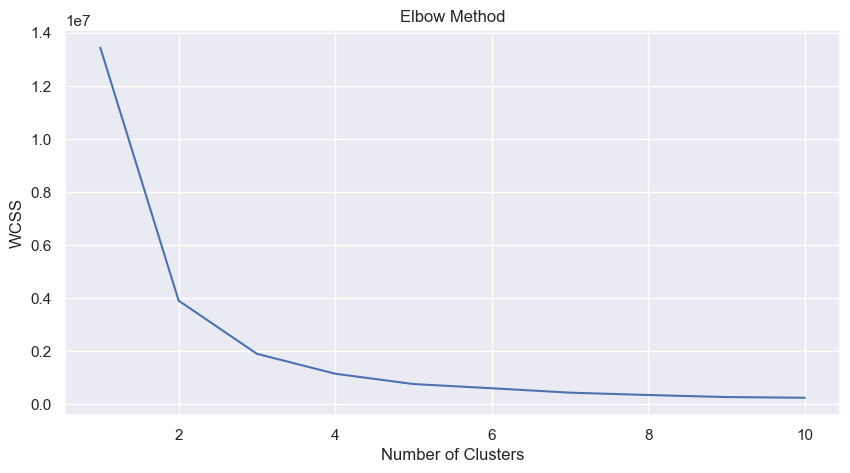

In [103]:
# kmeans clustering
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score

X = df[['Age']]
y = df[['Damage']]

wcss = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++')
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 5))
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()


It looks like the optimal number of clusters is 3. </br>

In [104]:
kmeans = KMeans(n_clusters=3, init='k-means++')
kmeans.fit(X)
y_pred = kmeans.predict(X)

print('Accuracy Score of KMeans:', accuracy_score(y, y_pred))

Accuracy Score of KMeans: 0.19027063252715196


The accuracy score is not very accurate, as expected. </br>
I will try the same feature but use the classification model to see if it will be more accurate. </br>

In [105]:
# classifcation model Tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = df[['Age']]
y = df[['Damage']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy Score of DecisionTreeClassifier:', accuracy_score(y_test, y_pred))

Accuracy Score of DecisionTreeClassifier: 0.36000788410367596


The accuracy score improved but it is still not near accurate. </br>

I will try creating a model for movement. </br>
I think it will be a good candidate because it has lots of parameters to train with but it's really right skewed which might effect accuracy. </br>

In [106]:
# classification model for movement
X = df[['Movement']]
y = df[['Damage']]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

model = DecisionTreeClassifier()

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print('Accuracy Score of DecisionTreeClassifier:', accuracy_score(y_test, y_pred))

Accuracy Score of DecisionTreeClassifier: 0.42584014979796986


As expected, the score is not impressive btu it is better than the previous models. </br>

I will now answer some statistical questions I created from beginning of the project. </br>
Answers will be posted in the conclusion section.

### Question 1. Which vehicle type (PartyType) has the worst vehicle damage? </br>

In [107]:
rev_partyType_dict = {value: key for key, value in partyType_dict.items()}
df['PartyType'] = df['PartyType'].map(rev_partyType_dict)

print('Vehicle Damage by PartyType:')
display(df.groupby('PartyType')['Damage'].mean().sort_values(ascending=False).round(3))

Vehicle Damage by PartyType:


PartyType
Scooter Non-Motorized     3.000
Car                       2.022
Motorcycle/Moped          1.964
Panel Truck               1.932
Scooter Motorized         1.733
Construction Equipment    1.714
Car With Trailer          1.658
Bus - School              1.600
Bicycle                   1.533
Other                     1.486
Pedestrian                1.455
Emergency Vehicle         1.401
Semi Truck                1.380
Light Rail Vehicle        1.333
Bus - Other               1.209
Train                     1.200
Skateboard                1.200
Ice Cream Truck           1.000
Wheelchair                1.000
Name: Damage, dtype: float64

### Question 2: Does sobriety have an impact on vehicle damage? </br>


Vehicle Damage by Sobriety:


Sobriety
Sleepy/Fatigued                            2.545
Had Been Drinking - Under Influence        2.386
Had Been Drinking - Impairment Unknown     2.291
Impairment Physical                        2.270
Under Drug Influence                       2.236
Had Been Drinking - Not Under Influence    2.054
Had Not Been Drinking                      1.937
Name: Damage, dtype: float64

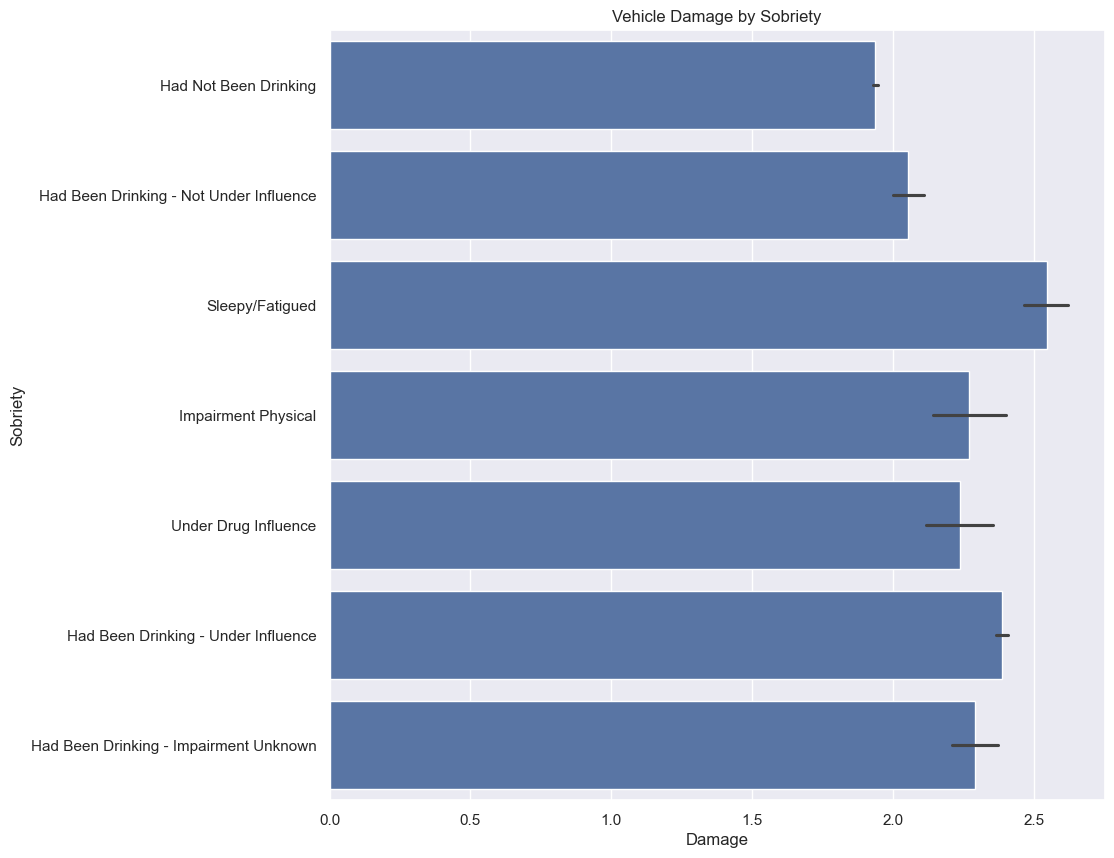

In [108]:
rev_sobreity_dict = {value: key for key, value in sobriety_dict.items()}
df['Sobriety'] = df['Sobriety'].map(rev_sobreity_dict)

print('Vehicle Damage by Sobriety:')
display(df.groupby('Sobriety')['Damage'].mean().sort_values(ascending=False).round(3))

# plot bar graph
plt.figure(figsize=(10, 10))
sns.barplot(x='Damage', y='Sobriety', data=df)
plt.title('Vehicle Damage by Sobriety')
plt.show()


### Question 3: Does sex and vehicle damage have a correlation? </br>


In [109]:
rev_sex_dict = {value: key for key, value in sex_dict.items()}
df["Sex"] = df["Sex"].map(rev_sex_dict)

print("Sex vs Vehicle Damage")
display(df.groupby("Sex")["Damage"].mean().sort_values(ascending=False).round(3))


Sex vs Vehicle Damage


Sex
M    2.003
F    1.971
Name: Damage, dtype: float64

### Quetion 4: Which movement preceding collisions causes the most damage? </br>


In [110]:
rev_movement_dict = {value: key for key, value in movement_dict.items()}
df["Movement"] = df["Movement"].map(rev_movement_dict)

print('Movement vs Vehicle Damage (mean)')
display(df.groupby('Movement')['Damage'].mean().sort_values(ascending=False).round(3))


Movement vs Vehicle Damage (mean)


Movement
Ran Off Road                   2.575
Crossing Into Opposing Lane    2.523
Other Unsafe Turning           2.396
Other                          2.132
Proceeding Straight            2.120
Making Left Turn               2.103
Traveling Wrong Way            2.028
Making U-Turn                  2.013
Entering Traffic               1.886
Parked                         1.829
Passing Other Vehicles         1.818
Changing Lanes                 1.802
Making Right Turn              1.699
Slowing/Stopping               1.636
Other (Ped)                    1.571
Stopped                        1.560
Merging                        1.521
Parking Maneuver               1.505
Backing                        1.437
Other (Bike)                   1.395
Stalled                        1.200
Name: Damage, dtype: float64

### Question 5: Which age group experiences the most severe vehicle damage? </br>


In [115]:
bin_list = list(range(0, 101, 5))  # list of bins for age 0-100, inc of 5

print('Age vs Vehicle Damage (mean)')
display(df.groupby(pd.cut(df['Age'], bins=bin_list))['Damage'].mean().sort_values(ascending=False).round(3))

display(df.head())

Age vs Vehicle Damage (mean)


Age
(90, 95]     2.222
(15, 20]     2.213
(20, 25]     2.139
(85, 90]     2.080
(80, 85]     2.069
(75, 80]     2.040
(25, 30]     2.025
(70, 75]     1.990
(65, 70]     1.965
(30, 35]     1.963
(95, 100]    1.952
(35, 40]     1.930
(40, 45]     1.904
(55, 60]     1.891
(45, 50]     1.889
(50, 55]     1.884
(60, 65]     1.873
(10, 15]     1.744
(5, 10]      1.333
(0, 5]       1.000
Name: Damage, dtype: float64

,Sex,Age,Damage,PartyCat,Sobriety,Direction,Movement,PartyType
2,F,50,1,0,Had Not Been Drinking,2,Parking Maneuver,Car
3,M,19,1,0,Had Not Been Drinking,0,Proceeding Straight,Car
9,M,76,3,0,Had Not Been Drinking,1,Proceeding Straight,Panel Truck
13,M,20,1,0,Had Not Been Drinking,1,Making Left Turn,Car
14,F,18,2,0,Had Not Been Drinking,1,Proceeding Straight,Car


## Conclusion

The analysis of vehicle crash data in San Jose from 2011 to 2023 reveals several key insights into factors influencing vehicle damage severity. Despite the data limitations and the moderate correlations among features, the findings highlight the significant impact of sobriety, specific movements, and age groups on vehicle damage severity. Future research could benefit from more comprehensive data and advanced modeling techniques to improve prediction accuracy.